# Pengenalan Pola

## Lab 1: Distribusi Gaussian dan Naive Bayes

Praktikum ini merupakan materi penunjang pertemuan ketiga dan keempat. Anda diasumsikan sudah mempunyai sedikit pengalaman menggunakan NumPy untuk mengolah matriks serta matplotlib dan seaborn untuk mengolah grafik. Dataset yang digunakan adalah data wine yang tersedia dari pustaka [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

sns.set_context('talk')

In [4]:
from sklearn.datasets import load_wine

# Memuat data
data = load_wine()

In [5]:
# Membagi data menjadi atribut dan kelas
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

### Distribusi Gaussian

Berikut ini kita akan mencoba mengasumsikan distribusi Gaussian dari fitur `ash` dan `alcanility_of_ash` untuk masing-masing kelas.

In [11]:
colors = sns.color_palette()

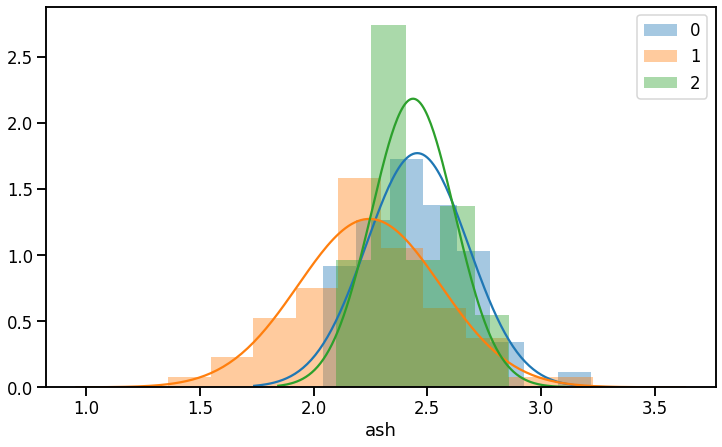

In [15]:
from scipy.stats import norm

fig, ax = plt.subplots(figsize=(12,7))
for c, color in zip(range(3), colors):
    sns.distplot(X[y == c]['ash'], kde=False, fit=norm, fit_kws={'color': color}, label=str(c))
plt.legend();

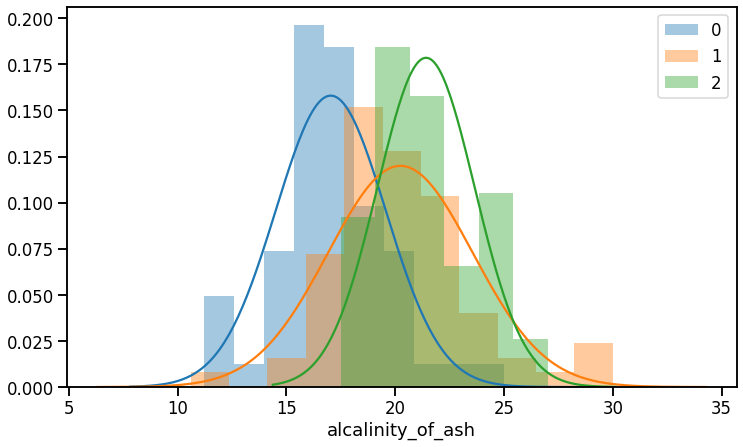

In [16]:
fig, ax = plt.subplots(figsize=(12,7))
for c, color in zip(range(3), colors):
    sns.distplot(X[y == c]['alcalinity_of_ash'], kde=False, fit=norm, fit_kws={'color': color}, label=str(c))
plt.legend();

Perhatikan dua grafik di atas. Kecenderungan yang kita asumsikan tadi ternyata terlihat dari histogram dan distribusi normal yang kita cocokkan ke histogram tersebut. Pada dasarnya, kita menghitung MLE dari distribusi Gaussian dari data yang kita punya. Dengan kata lain, kita menghitung

$$
\hat{\mu} = \frac{1}{N}\sum_{i=1}^N x_i
$$
dan
$$
\hat{\sigma}^2 = \frac{1}{N}\sum_{i=1}^N (x_i - \mu)^2
$$

Dalam kode, Anda dapat melakukannya dengan berbagai cara seperti contoh di bawah ini. Misalkan kita akan menghitung $\hat{\mu}$ dan $\hat{\sigma}^2$ dari variabel `ash`.

In [19]:
x = X[y == 2]['ash'] # nilai ash dari kelas 2

print('Dengan library SciPy:')
mu, sigma = norm.fit(x)
print('μ = {:.2f}'.format(mu))
print('σ = {:.2f}'.format(sigma))

print()

print('Dengan rumus di atas untuk menghitung MLE:')
print('μ = {:.2f}'.format(x.mean()))
print('σ = {:.2f}'.format(x.std()))

Dengan library SciPy:
μ = 2.44
σ = 0.18

Dengan rumus di atas untuk menghitung MLE:
μ = 2.44
σ = 0.18


### Multivariate Gaussian

Mari kita coba melihat kedua fitur tersebut secara bersamaan. Apakah polanya akan lebih terlihat? Untuk mengetahui hal tersebut, kita dapat mengasumsikan bahwa kedua fitur tersebut akan mengikuti distribusi Gaussian untuk dua variabel, i.e. bivariate Gaussian.

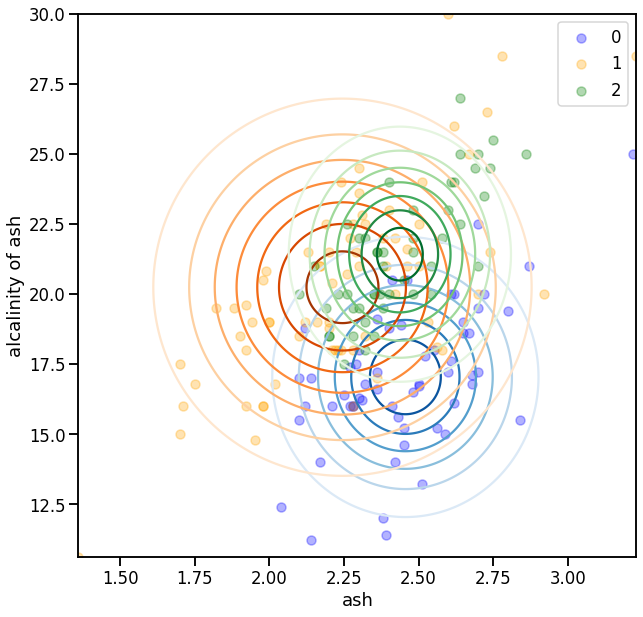

In [48]:
from scipy.stats import multivariate_normal

fig, ax = plt.subplots(figsize=(10,10))
ash = np.linspace(*X['ash'].agg(['min','max']), 500)
alcalinity = np.linspace(*X['alcalinity_of_ash'].agg(['min','max']), 500)

cmaps = ['Blues', 'Oranges', 'Greens']
for c, color in zip(range(3), cmaps):
    df = X.loc[y == c, ['ash', 'alcalinity_of_ash']]
    cov = df.cov().values
    cov[0,1] = 0
    cov[1,0] = 0
    mvn = multivariate_normal(
        df.mean(),
        cov
    )

    x1, x2 = np.meshgrid(ash, alcalinity)
    pos = np.dstack([x1, x2])
    z = mvn.pdf(pos)
    ax.contour(x1, x2, z, cmap=color)
    ax.scatter(df['ash'], df['alcalinity_of_ash'], facecolor=color[:-1].lower(), alpha=0.3, label=str(c))
    ax.set_xlabel('ash')
    ax.set_ylabel('alcalinity of ash')
plt.legend();

Pada grafik di atas, kita menggunakan asumsi naif dari Naive Bayes sehingga nilai matriks kovariansinya (*covariance matrix*) adalah

$$
\Sigma = \begin{bmatrix}
\Sigma_{11} & 0 \\ 
0 & \Sigma_{22}
\end{bmatrix}
$$

yang disebut juga sebagai *diagonal covariance matrix*. Dampaknya, *contour plot* di atas menjadi sejajar sumbu (*axis-aligned*).

Asumsi tersebut dapat dilunakkan dengan menggunakan *full covariance matrix* seperti di bawah ini.

$$
\Sigma = \begin{bmatrix}
\Sigma_{11} & \Sigma_{12} \\ 
\Sigma_{21} & \Sigma_{22}
\end{bmatrix}
$$

Jika Anda taruh kedua grafik bertumpukan, maka Anda akan dapat melihat bahwa *contour plot* di bawah terlihat lebih miring.

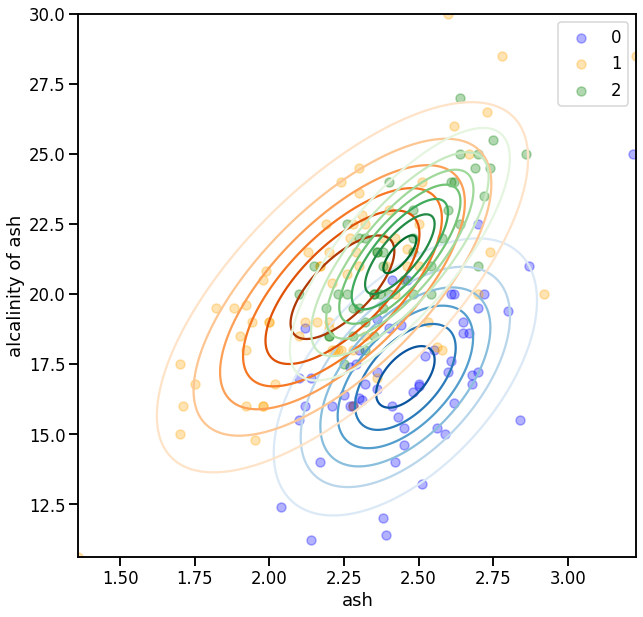

In [49]:
fig, ax = plt.subplots(figsize=(10,10))
ash = np.linspace(*X['ash'].agg(['min','max']), 500)
alcalinity = np.linspace(*X['alcalinity_of_ash'].agg(['min','max']), 500)

cmaps = ['Blues', 'Oranges', 'Greens']
for c, color in zip(range(3), cmaps):
    df = X.loc[y == c, ['ash', 'alcalinity_of_ash']]
    cov = df.cov().values
    mvn = multivariate_normal(
        df.mean(),
        cov
    )

    x1, x2 = np.meshgrid(ash, alcalinity)
    pos = np.dstack([x1, x2])
    z = mvn.pdf(pos)
    ax.contour(x1, x2, z, cmap=color)
    ax.scatter(df['ash'], df['alcalinity_of_ash'], facecolor=color[:-1].lower(), alpha=0.3, label=str(c))
    ax.set_xlabel('ash')
    ax.set_ylabel('alcalinity of ash')
plt.legend();

Ingat kembali bahwa nilai
\begin{align}
\Sigma_{12} = \Sigma_{21} &= \mathbb{E}[(X_1 - \mu_1)(X_2 - \mu_2)] \\
                          &= \mathbb{E}[X_1 X_2] - \mu_1 \mu_2
\end{align}

Bukti:
\begin{align}
\Sigma_{12} &= \mathbb{E}[(X_1 - \mu_1)(X_2 - \mu_2)] \\
&= \mathbb{E}[X_1 X_2 - X_1 \mu_2 - X_2 \mu_1 + \mu_1 \mu_2] \\
&= \mathbb{E}[X_1 X_2] - \mathbb{E}[X_1 \mu_2] - \mathbb{E}[\mu_1 X_2] + \mathbb{E}[\mu_1 \mu_2] \\
&= \mathbb{E}[X_1 X_2] - \mu_2 \mathbb{E}[X_1] - \mu_1 \mathbb{E}[X_2] + \mu_1 \mu_2 \\
&= \mathbb{E}[X_1 X_2] - \mu_2 \mu_1 - \mu_1 \mu_2 + \mu_1 \mu_2 \\
&= \mathbb{E}[X_1 X_2] - \mu_1 \mu_2 \\
\end{align}

In [50]:
x1 = X.loc[y == 2,'ash']
x2 = X.loc[y == 2,'alcalinity_of_ash']
print('Σ11 = {:.4f}'.format(x1.var()))
print('Σ12 = {:.4f}'.format(np.dot(x1-x1.mean(), x2-x2.mean())/len(x1)))
print('Σ22 = {:.4f}'.format(x2.var()))

Σ11 = 0.0341
Σ12 = 0.3098
Σ22 = 5.0993
